# Description 
## Context
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

Let's import the packages needed for the analysis;

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There are two datasets: one refers to 2021 and one to years from 2005 to 2020

In [6]:
# Importing the datasets
data20 = pd.read_csv(
    r'datasets\World happiness report\world-happiness-report.csv'
    )

data21 = pd.read_csv(
    r'datasets\World happiness report\world-happiness-report-2021.csv'
    )

**Let's see some structural and basic information on the data:**

In [7]:
print("Data from 2005 to 2020 shape: ", data20.shape,"\n" 
    "Data 2021 shape: ", data21.shape)

Data from 2005 to 2020 shape:  (1949, 11) 
Data 2021 shape:  (149, 20)


The datasets don't have the same columns, so we can't concatenate them together
in order to form a new complete dataset. We can see what columns they cointain:

In [8]:
print("Data from 2005 to 2020 columns: ",data20.columns,
"\nData 2021 columns: ",data21.columns)

Data from 2005 to 2020 columns:  Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object') 
Data 2021 columns:  Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


Columns in both datasets:

In [9]:
data20.columns.intersection(data21.columns)

Index(['Country name', 'Social support', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')

Only these 5 columns are in both datasets, so we can't perform only one analysis
on the merged dataset.
I'll divide the notebook in three sections/analysis
1. From 2005 to 2020
2. 2021
3. Merged datasets

# 1 - From 2005 to 2020
Let's see the first lines of the dataset:

In [10]:
data20.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Which are unique Countries inside the report? And how many are they?

In [11]:
print(data20['Country name'].unique(), '\n')
print('In the dataset there are {0} Countries'.format(len(data20['Country name'].unique())))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'Malay

Now we can see some information and descriptive statistics from the dataset:

In [12]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [13]:
data20.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


This dataset is formed by 1949 rows and 11 columns:
1. **Country name**
2. **year**
3. **Life Ladder**
4. **Log GDP per capita**
5. **Social support**
6. **Healthy life expectancy at birth**:
7. **Freedom to make life choices**
8. **Genersity**
9. **Perceptions of corruptions**
10. **Positive affect**
11. **Negative affect**

All columns, except `Country name`, is numerical.

Columns count value makes us deduce that there are some missing values.
We have to check them:

In [14]:
# Checking NAs per column
data20.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

Life Ladder index has no missing values, it means that other indexes NA have
been imputed to calculate the esteem. I think it's a good decision, as 
`Perceptions of corruptions` is the column with the highest number of missings
and it is slightly higher than 5% of observations (110/1949).

### **Life Ladder**
The target of the analysis is to explore happiness score through Countries and Years.
We can see it's distribution through a boxplot:

Text(0.5, 0, 'Life Ladder')

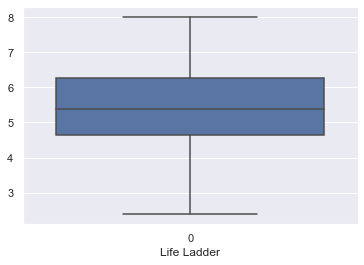

In [15]:
sns.set()
sns.boxplot(data=data20['Life Ladder'])
plt.xlabel('Life Ladder')

Now we can continue the exploration seeing how the score behaves in relatives countries and years.

Here is the average in each Country in descending order:

In [16]:
avg_lifeLadder = pd.pivot_table(data=data20, index=['Country name'], values=['Life Ladder'],
               aggfunc=np.mean).sort_values(by='Life Ladder', ascending=False)

Below we see the 5 happiest and the 5 saddest countries on average:

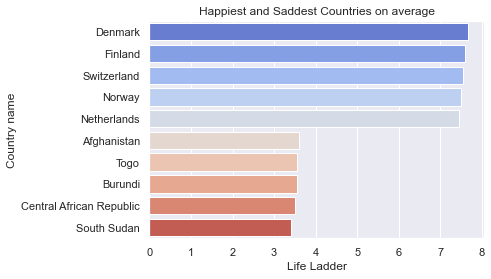

In [17]:
happy_and_sad = pd.concat([avg_lifeLadder[0:5], avg_lifeLadder[-5:]])
sns.barplot(x = 'Life Ladder', y = happy_and_sad.index, data = happy_and_sad,
            palette='coolwarm')
plt.title('Happiest and Saddest Countries on average')
plt.show()

Nord Europe countries seem to be the happiest in the world.
On the contrary, the less happiest (obviously on average) are Afghanistan and African countries.
*(It's out of scope, but I send a prayer for Afghanistan population)*

Let's see if happiness, without considering countries division, improved over time:

In [18]:
pd.pivot_table(data=data20.sort_values(by=['year']), values='Life Ladder', index='year', aggfunc=np.mean)

,Life Ladder
year,
2005,6.446259
2006,5.196899
2007,5.418275
2008,5.418509
2009,5.457667
2010,5.496806
2011,5.424082
2012,5.443754
2013,5.394562


There is no evidence, on average, that happiness increased over time. Furthermore, due to
Coronavirus pandemic I didn't except to find 2020 in second place.
In addition, we can see the average of happiness index through time in each state:

In [19]:
country_year_pivot = pd.pivot_table(data=data20, index=['Country name', 'year'], values='Life Ladder',
                                    aggfunc=np.mean)
country_year_pivot

Life Ladder
Country name year             
Afghanistan  2008        3.724
             2009        4.402
             2010        4.758
             2011        3.832
             2012        3.783
...                        ...
Zimbabwe     2016        3.735
             2017        3.638
             2018        3.616
             2019        2.694
             2020        3.160

[1949 rows x 1 columns]

A better display of the same information can be achieved as follows:

In [20]:
pd.pivot_table(data=data20, index='Country name', columns='year', values='Life Ladder')

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country name,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.724,4.402,4.758,3.832,3.783,3.572,3.131,3.983,4.220,2.662,2.694,2.375,NaN
Albania,NaN,NaN,4.634,NaN,5.485,5.269,5.867,5.510,4.551,4.814,4.607,4.511,4.640,5.004,4.995,5.365
Algeria,NaN,NaN,NaN,NaN,NaN,5.464,5.317,5.605,NaN,6.355,NaN,5.341,5.249,5.043,4.745,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589,4.360,3.937,3.795,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.313,6.073,5.961,6.424,6.441,6.776,6.468,6.582,6.671,6.697,6.427,6.039,5.793,6.086,5.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.17,6.525,NaN,6.258,7.189,7.478,6.580,7.067,6.553,6.136,5.569,4.041,5.071,5.006,5.081,4.574
Vietnam,NaN,5.294,5.422,5.480,5.304,5.296,5.767,5.535,5.023,5.085,5.076,5.062,5.175,5.296,5.467,NaN
Yemen,NaN,NaN,4.477,NaN,4.809,4.350,3.746,4.061,4.218,3.968,2.983,3.826,3.254,3.058,4.197,NaN


Many observations have no relevation of the happiness score. We already know that `Life Ladder` column has no missing values, so I suppose that where it is missing it's due to the fact that there are no observations at all for the respective year and Country.

With the `aggfunc` parameter integreted in `pivot_table()` method we can extract
more information on the distribution of happiness score in each country.
Looking carefully, the pivot below is full of insights. 

In [21]:
pd.pivot_table(data=data20, values='Life Ladder', index='Country name',
               aggfunc=[np.mean, np.median, np.std ,max, min])

,mean,median,std,max,min
,Life Ladder,Life Ladder,Life Ladder,Life Ladder,Life Ladder
Country name,,,,,
Afghanistan,3.594667,3.7535,0.740986,4.758,2.375
Albania,5.019385,4.9950,0.441690,5.867,4.511
Algeria,5.389875,5.3290,0.470102,6.355,4.745
Angola,4.420250,4.1485,0.815286,5.589,3.795
Argentina,6.310133,6.4240,0.313529,6.776,5.793
...,...,...,...,...,...
Venezuela,6.019867,6.2580,1.064194,7.478,4.041
Vietnam,5.305857,5.2960,0.213666,5.767,5.023


And using `country_year_pivot` DataFrame object we can see the happiest and the
saddest countries by year:

In [22]:
country_year_pivot.swaplevel(0, 1)

,,Life Ladder
year,Country name,
2008,Afghanistan,3.724
2009,Afghanistan,4.402
2010,Afghanistan,4.758
2011,Afghanistan,3.832
2012,Afghanistan,3.783
...,...,...
2016,Zimbabwe,3.735
2017,Zimbabwe,3.638
2018,Zimbabwe,3.616


In [23]:
country_year_pivot.swaplevel(0,1).groupby(level=['year', 'Country name']).max().head(20)

Life Ladder
year Country name               
2005 Australia             7.341
     Belgium               7.262
     Brazil                6.637
     Canada                7.418
     Czech Republic        6.439
     Denmark               8.019
     Egypt                 5.168
     France                7.093
     Germany               6.620
     Greece                6.006
     Hungary               5.194
     Iran                  5.308
     Italy                 6.854
     Japan                 6.516
     Jordan                6.295
     Lebanon               5.491
     Mexico                6.581
     Netherlands           7.464
     Pakistan              5.225
     Poland                5.587

What is the situation of happiness in my country (Italy) compared to overall average (without Italy)?

In [24]:
italy_avg = country_year_pivot[country_year_pivot.index.isin(['Italy'], level=0)]
overall_avg = pd.pivot_table(data=data20.loc[data20['Country name'] != 'Italy'], index='year', values='Life Ladder', aggfunc=np.mean)
happiness_difference = pd.merge(left=italy_avg, right=overall_avg, on='year')
happiness_difference.columns = ['Italy score', 'Overall avg']
happiness_difference['Delta'] = happiness_difference['Italy score'] - happiness_difference['Overall avg']
happiness_difference

,Italy score,Overall avg,Delta
year,,,
2005,6.854,6.430577,0.423423
2007,6.574,5.406832,1.167168
2008,6.780,5.406018,1.373982
2009,6.334,5.449912,0.884088
2010,6.354,5.489837,0.864163
2011,6.057,5.419717,0.637283
2012,5.839,5.440950,0.398050
2013,6.009,5.390044,0.618956
2014,6.027,5.384590,0.642410


In general, Italy is happier than other countries average.

### **Other indicators**
Now we can see the distributions of other indicators

In [25]:
list(data20.iloc[:,3:].columns)

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

`Log GDP per capita` and `Healthy life expectancy at birth` are on another scale
compared to other columns, so I will create three different boxplots.

Text(0.5, 0, 'Log GDP per capita')

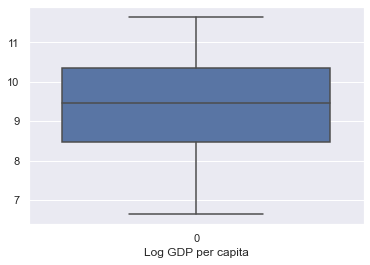

In [26]:
sns.boxplot(data=data20['Log GDP per capita'])
plt.xlabel('Log GDP per capita')

The difference between richest and poorest countries is huge.

Text(0.5, 0, 'Healthy life expectancy at birth')

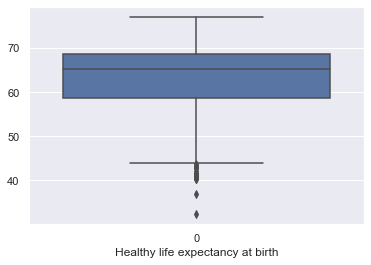

In [27]:
sns.boxplot(data=data20['Healthy life expectancy at birth'])
plt.xlabel('Healthy life expectancy at birth')

The median of `Life expectancy at birth` is near 70 years old. It is disconcerting
that there are some outliers in which the value of this column is under 45 years old.
I want to see which countries are them:

In [28]:
print(data20.loc[data20['Healthy life expectancy at birth'] < 45]['Country name'].unique())

['Central African Republic' 'Chad' 'Haiti' 'Malawi' 'Mozambique' 'Nigeria'
 'Sierra Leone' 'Swaziland' 'Zambia' 'Zimbabwe']


They are all African Countries. Hoping that the situation will improve in the future.

<AxesSubplot:>

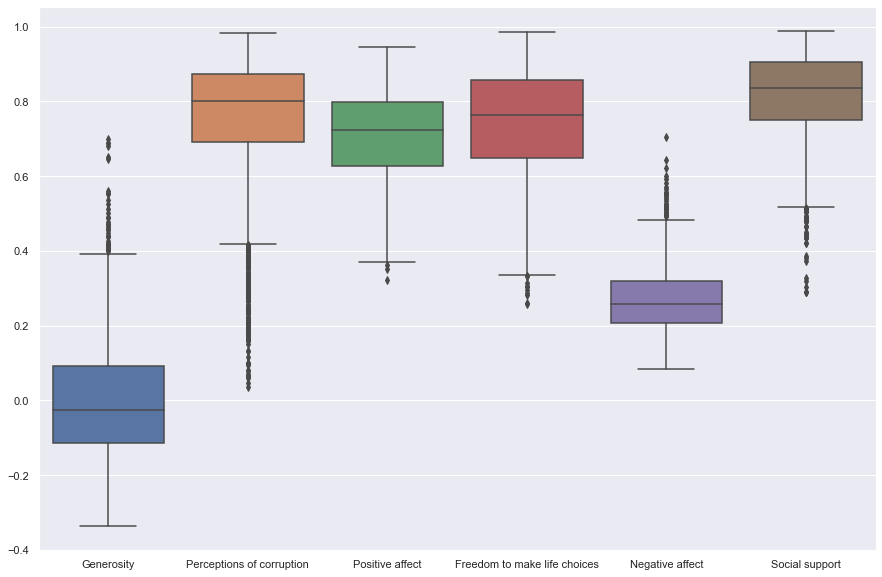

In [29]:
indicators = [ 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
       'Positive affect', 'Negative affect']
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(data=data20[set(indicators) - set(['Log GDP per capita','Healthy life expectancy at birth'])])

If we are interested, we can see the relationship of `Life Ladder` and other
indicators through scatter plots.
I'm curious to see the scatterplot of:
1. `Life Ladder` and `Log GDP per capita`
2. `Life Ladder` and `Life expectancy at birth`
3. `Life Ladder` and one of the other indicators: `Perceptions of corruption`

<AxesSubplot:xlabel='Life Ladder', ylabel='Log GDP per capita'>

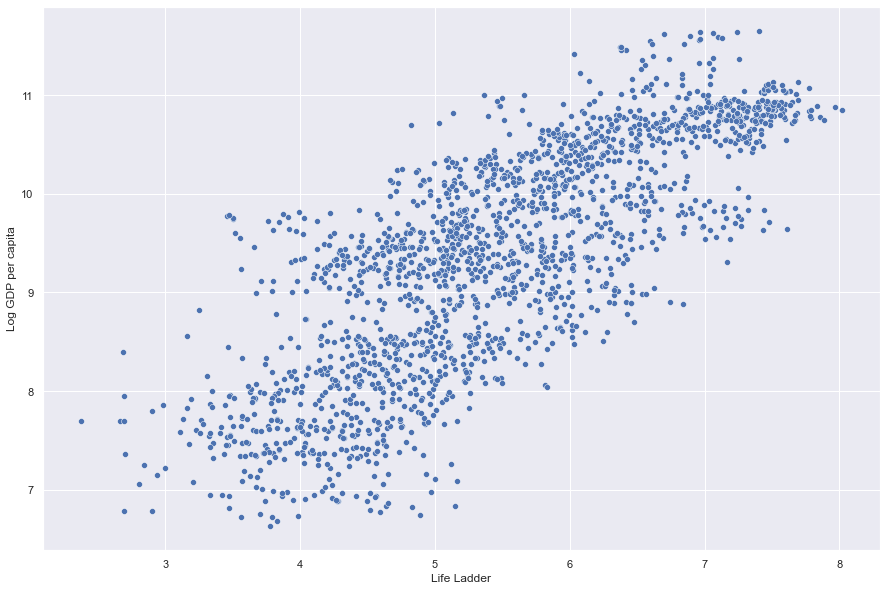

In [30]:
#help(sns.scatterplot)
sns.scatterplot(x='Life Ladder', y='Log GDP per capita', data=data20)

It's clear that there is a linear positive correlation between these two variables.

<AxesSubplot:xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

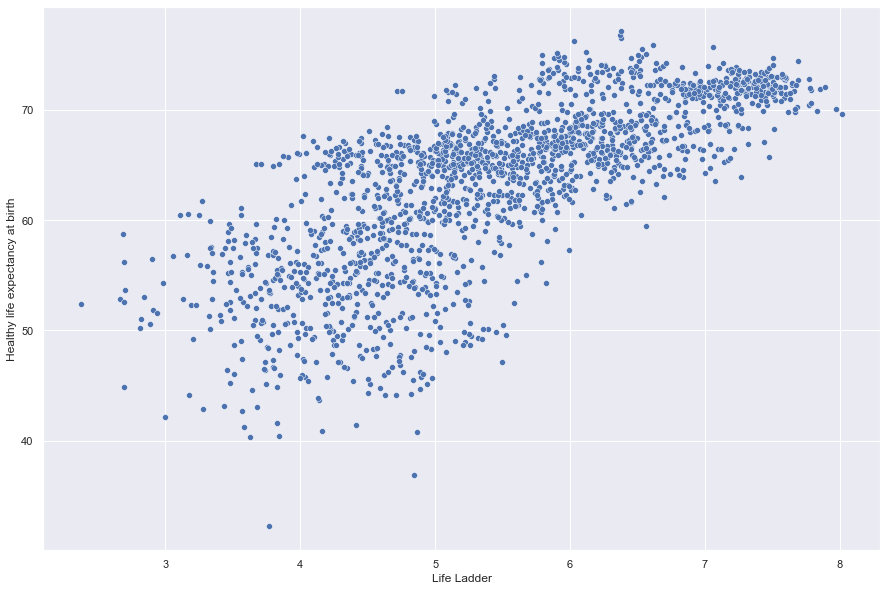

In [31]:
sns.scatterplot(x='Life Ladder', y='Healthy life expectancy at birth', data=data20)

Here there is a positive correlation too, but less strong and less linear. 

<AxesSubplot:xlabel='Life Ladder', ylabel='Perceptions of corruption'>

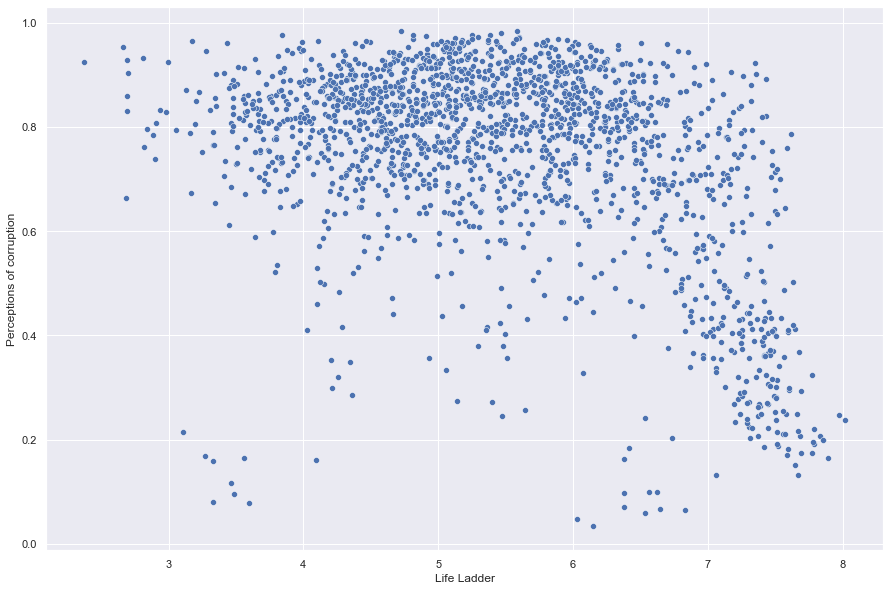

In [32]:
sns.scatterplot(x='Life Ladder', y='Perceptions of corruption', data=data20)

Through this graph we can see a negative correlation between `Life Ladder` and
`Perception of corruption`

## Correlation between numerical variables

<AxesSubplot:>

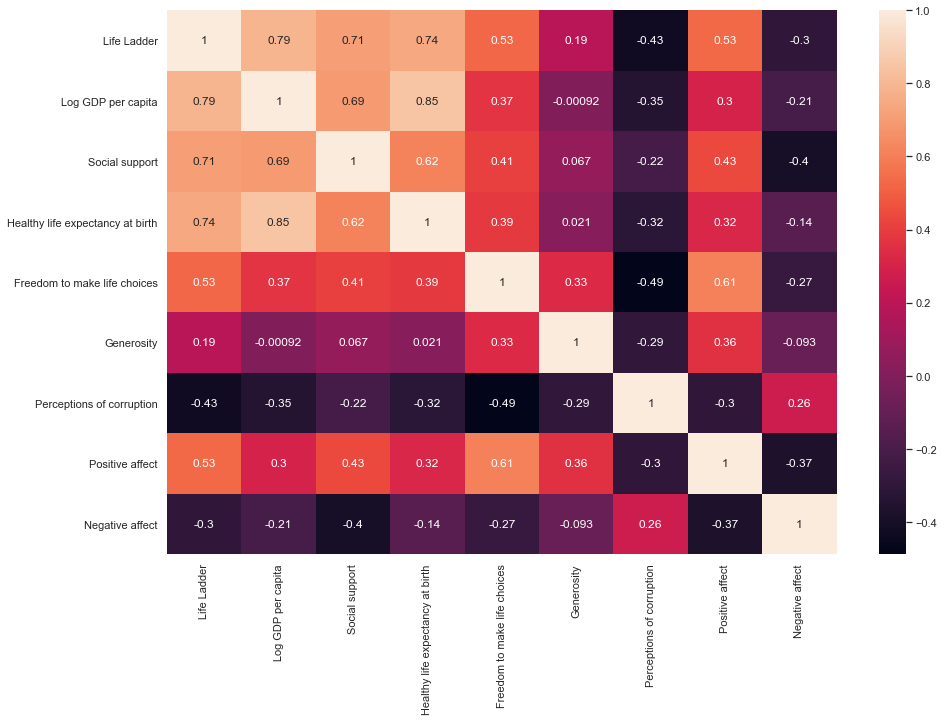

In [34]:
# Select only numerical columns
data_num = data20.iloc[:, 2:]

# Calculate the correlation matrix (Pearson coefficient)
corr = data_num.corr()

# Plot correlation matrix
sns.heatmap(corr, annot=True)

- `Negative affect` and `Perceptions of corruption` are negatively correlated with
other variables. 
- As we expected, `Life Ladder` is strongly correlated with `Log GDP per capita`,
`Social support` and `Healthy life expectancy at birth`

Now it's time to explore the closest period to us with 2021 data. 

# 2 - 2021 Data

In [35]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

There are more columns than in the previous dataframe.
The main columns - the 6 factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity - remained the same. The main change is that there is the reference to Dystopia, an hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

I'd like to see the head of the dataset:

In [36]:
data21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


I really like the addition of the Regional indicator.

Let's see some information on the new dataset:

In [37]:
data21.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


Do the 149 rows of the dataset represent one unique country each?

In [38]:
len(data21['Country name'].unique())

149

Yes, every row refers to a different country.

I don't understand how `upperwhiskers` and `lowerwhiskers` have been calculated.
I suppose that the `Std errore of Ladder score` derives from them, but every
country relevation is unique so it's not clear to me.

We can do a similar analysis to the previous one. But I prefer to see something
different here.

## Regional indicator
With a pivot table we can analyze the situation in the regions.

In [39]:
pd.pivot_table(data=data21, index='Regional indicator', values='Ladder score',
               aggfunc=np.mean).sort_values(by='Ladder score', ascending=False)

,Ladder score
Regional indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


- North America and Australia & New Zealand, Western Europe and Central and Eastern Europe
are the happiest regions.
- South Asia, Sub-Saharan Africa and Middle East and North Africa are the least happy
in the world.

We could see every variable one by one. But I'll leave this task to you.

# 3- Merge datasets
We can concatenate the two DataFrame in order to have complete data from 2005 to 2021.

In [40]:
data20.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [41]:
data21.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [42]:
data21['year'] = 2021
data21.rename(columns={'Ladder score': 'Life Ladder',
                       'Logged GDP per capita':'Log GDP per capita',
                       'Healthy life expectancy at birth':'Healthy life expectancy'}, 
                       inplace=True)

In [43]:
data21.columns.intersection(data20.columns)

Index(['Country name', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [44]:
data_complete = pd.concat([data20, data21])

In [64]:
np.sort(data_complete['year'].unique())

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)


The reader can concatenate the datasets on the columns in common and perform
one analysis.

All reference at [Kaggle World Happiness Report](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)